**Data Mining Semester Project**
#Title: Customer Behavior Analytics and Predictive Segmentation for Targeted Marketing

#Members:
***Ahmed Bilal Nazim (2022064)***

***Ahmad Ali Khan (2022054)***

#Step 1: Load and Prepare Dataset in Colab

***Step 1.1: Import Required Libraries***

In [2]:
import pandas as pd


***Step 1.2: Load the Dataset (Tab-Separated Format)***


In [3]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')


***Step 1.3: Check Dataset Shape and Column Names***

In [4]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())


Dataset Shape: (2240, 29)

Column Names:
 ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


***Step 1.4: Check for Missing Values***

In [5]:
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())



Missing Values in Each Column:

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


***Step 1.5: Preview the First 5 Rows***

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#✅ STEP 2: Data Preprocessing
🎯 Goal:
Handle missing values

Convert data types (e.g., date column)

Encode categorical variables

Create any new useful features

***Step 2.1: Handle Missing Values***

In [7]:
# Check again for missing values
print(df.isnull().sum())

# Drop rows with missing income values (optionally you can impute instead)
df = df.dropna(subset=['Income'])

# Confirm no missing values
print("\nMissing values after cleaning:\n", df.isnull().sum())


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Missing values after cleaning:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0


***Step 2.2: Convert 'Dt_Customer' to Datetime and Create New Feature***

In [8]:
# Convert to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Create new feature: how long customer has been with the company
df['Customer_Since_Days'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days


***Step 2.3: Encode Categorical Variables***

In [9]:
# One-hot encode 'Education' and 'Marital_Status'
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# No need to encode binary columns like 'Complain' or 'Response' — already numeric


***Step 2.4: Preview Cleaned and Transformed Data***

In [10]:
print("Transformed dataset shape:", df.shape)
df.head()


Transformed dataset shape: (2216, 39)


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,True,False,False,False,False,False,True,False,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,True,False,False,False,False,False,True,False,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,True,False,False,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,True,False,False,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,False,True,False,False,True,False,False,False,False


#✅ STEP 3: Exploratory Data Analysis (EDA)
🎯 Goal:
Visualize distributions

Detect outliers and trends

Understand relationships between variables

***Step 3.1: Import Visualization Libraries***

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')


***Step 3.2: Plot Distribution of Numerical Features***

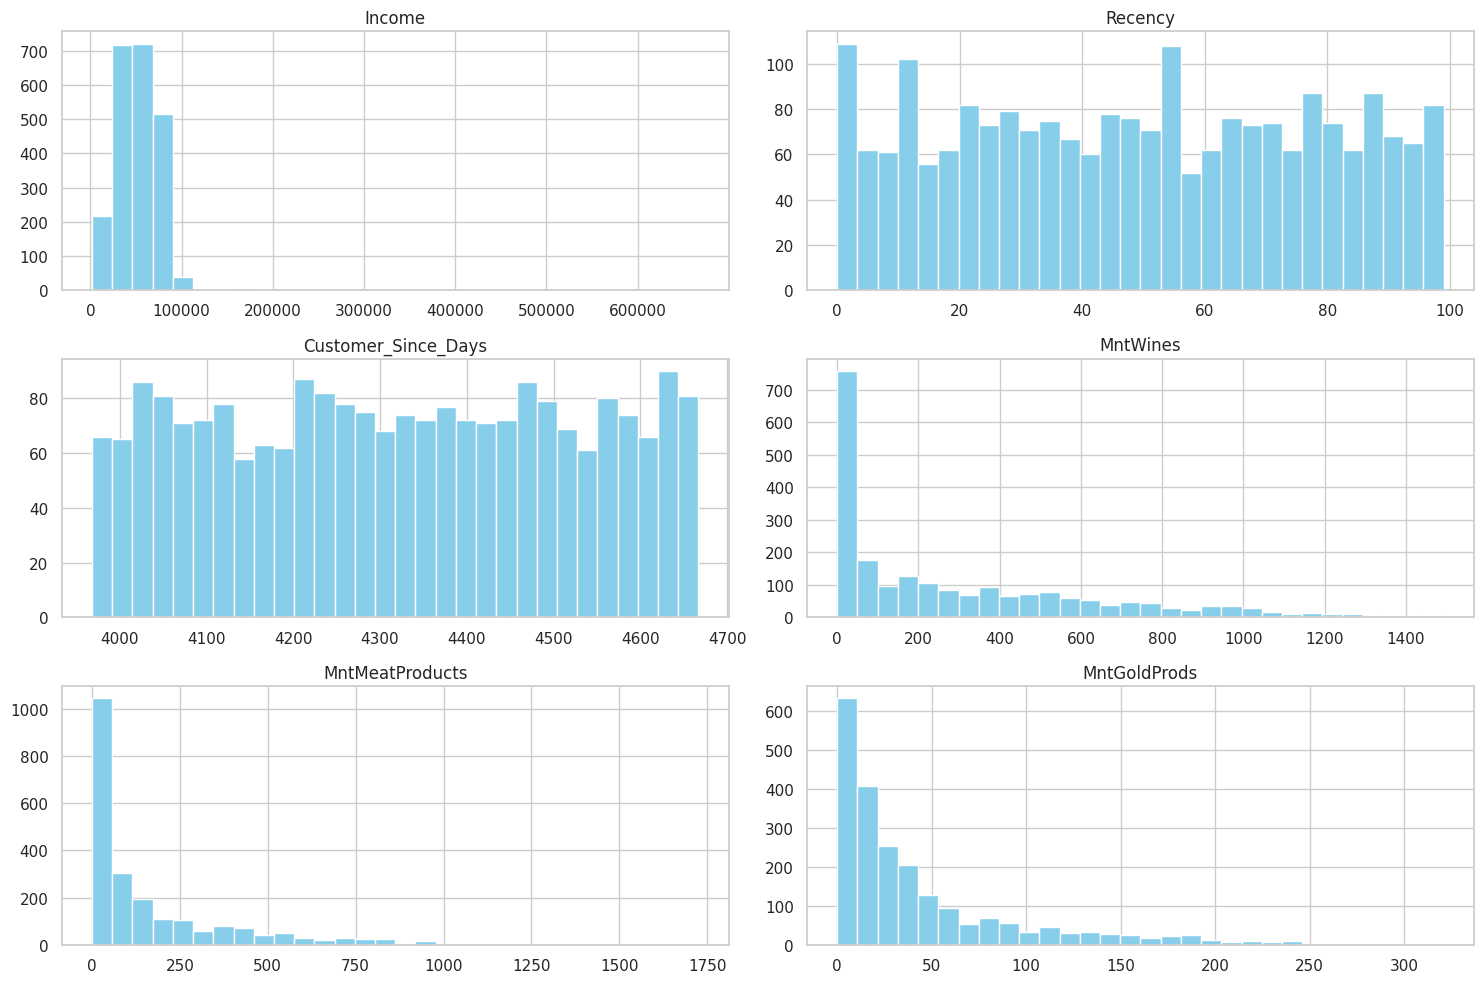

In [12]:
# Plot histograms for selected numerical features
num_cols = ['Income', 'Recency', 'Customer_Since_Days',
            'MntWines', 'MntMeatProducts', 'MntGoldProds']

df[num_cols].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.tight_layout()
plt.show()


***Step 3.3: Correlation Heatmap***

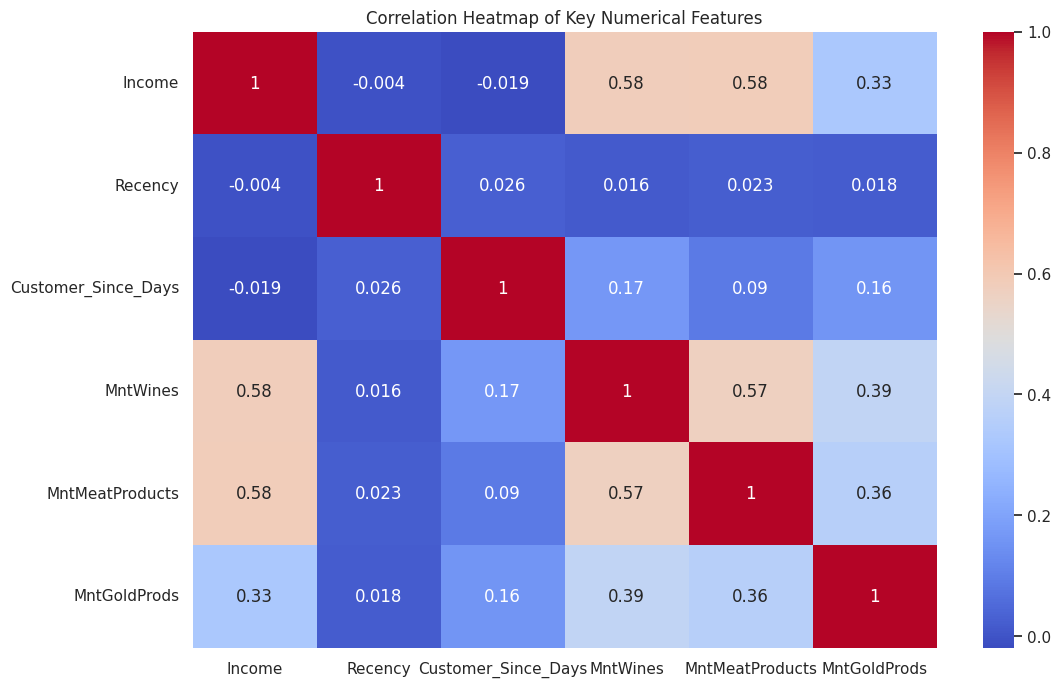

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Key Numerical Features")
plt.show()


***Step 3.4: Response Rate by Education and Marital Status***

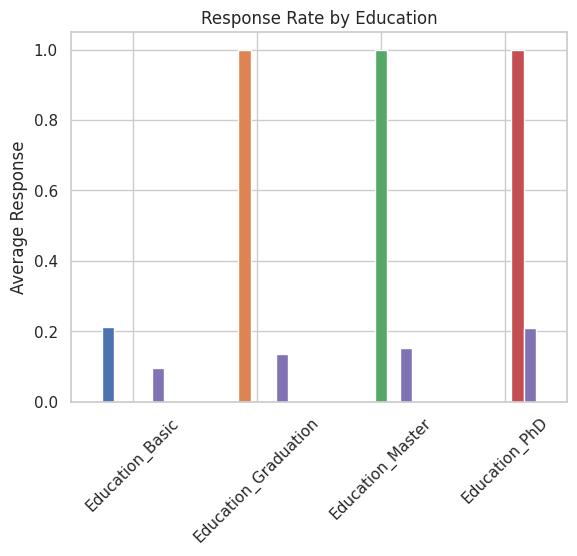

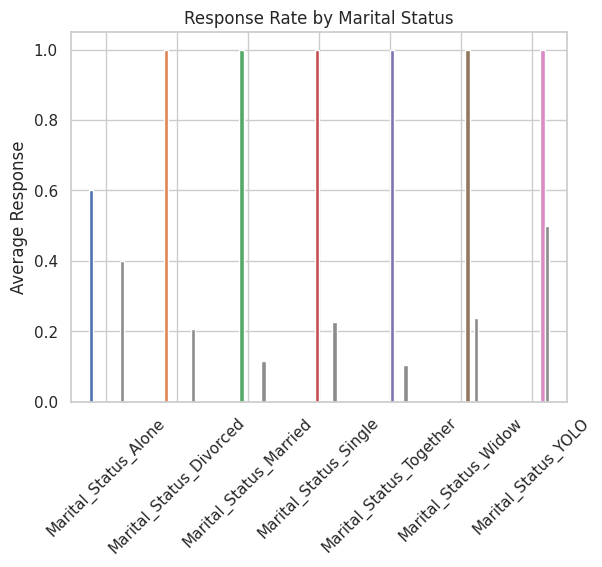

In [14]:
# Note: We dropped the original columns during one-hot encoding
# So here’s how to visualize with existing dummies:
edu_cols = [col for col in df.columns if 'Education_' in col]
marital_cols = [col for col in df.columns if 'Marital_Status_' in col]

# Sum up responses grouped by category dummies
edu_response = df[edu_cols + ['Response']].groupby(df[edu_cols].idxmax(axis=1)).mean()
marital_response = df[marital_cols + ['Response']].groupby(df[marital_cols].idxmax(axis=1)).mean()

edu_response.plot(kind='bar', legend=False, title='Response Rate by Education')
plt.ylabel("Average Response")
plt.xticks(rotation=45)
plt.show()

marital_response.plot(kind='bar', legend=False, title='Response Rate by Marital Status')
plt.ylabel("Average Response")
plt.xticks(rotation=45)
plt.show()


***Step 3.5: Spending Pattern Boxplots***

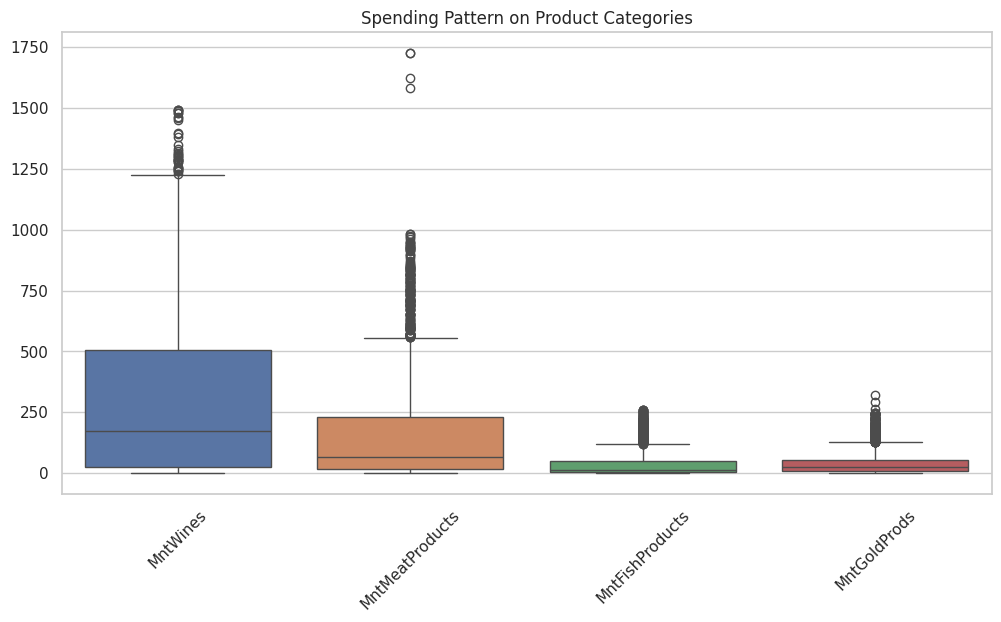

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds']])
plt.title("Spending Pattern on Product Categories")
plt.xticks(rotation=45)
plt.show()


#✅ STEP 4: Association Rule Mining
🎯 Goal:
Identify frequent itemsets

Derive association rules (e.g., customers who buy wine also buy meat)

Interpret strong rules for marketing insight

***Step 4.1: Install and Import Required Library***

In [16]:
!pip install mlxtend

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


***Step 4.2: Convert Product Purchase Data to Binary Format***

In [17]:
# Select product-related columns
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Convert to binary: 1 if spent > 0
basket = df[product_cols].applymap(lambda x: 1 if x > 0 else 0)

basket.head()


<ipython-input-17-6dde3d5b023f>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = df[product_cols].applymap(lambda x: 1 if x > 0 else 0)


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1


***Step 4.3: Generate Frequent Itemsets***

In [18]:
# Generate frequent itemsets with minimum support of 5%
frequent_items = apriori(basket, min_support=0.05, use_colnames=True)

# View top itemsets
frequent_items.sort_values(by="support", ascending=False).head(10)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
2,0.999549,(MntMeatProducts)
0,0.994134,(MntWines)
7,0.994134,"(MntMeatProducts, MntWines)"
5,0.972473,(MntGoldProds)
17,0.972022,"(MntGoldProds, MntMeatProducts)"
27,0.966606,"(MntGoldProds, MntMeatProducts, MntWines)"
10,0.966606,"(MntGoldProds, MntWines)"
3,0.828971,(MntFishProducts)
15,0.828520,"(MntMeatProducts, MntFishProducts)"
25,0.823105,"(MntMeatProducts, MntFishProducts, MntWines)"


***Step 4.4: Generate Association Rules***

In [19]:
# Derive rules with minimum confidence of 0.3
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.3)

# View sorted by lift
rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
555,"(MntGoldProds, MntMeatProducts, MntFishProduct...","(MntFruits, MntSweetProducts)",0.805505,0.724729,0.647112,0.803361,1.108499,1.0,0.063339,1.399881,0.503247,0.732754,0.285654,0.848131
586,"(MntFruits, MntSweetProducts)","(MntGoldProds, MntMeatProducts, MntFishProduct...",0.724729,0.805505,0.647112,0.892902,1.108499,1.0,0.063339,1.816037,0.355573,0.732754,0.449350,0.848131
571,"(MntFruits, MntMeatProducts, MntSweetProducts)","(MntGoldProds, MntFishProducts, MntWines)",0.724729,0.805505,0.647112,0.892902,1.108499,1.0,0.063339,1.816037,0.355573,0.732754,0.449350,0.848131
460,"(MntGoldProds, MntFishProducts, MntWines)","(MntFruits, MntSweetProducts)",0.805505,0.724729,0.647112,0.803361,1.108499,1.0,0.063339,1.399881,0.503247,0.732754,0.285654,0.848131
570,"(MntGoldProds, MntFishProducts, MntWines)","(MntFruits, MntMeatProducts, MntSweetProducts)",0.805505,0.724729,0.647112,0.803361,1.108499,1.0,0.063339,1.399881,0.503247,0.732754,0.285654,0.848131
469,"(MntFruits, MntSweetProducts)","(MntGoldProds, MntFishProducts, MntWines)",0.724729,0.805505,0.647112,0.892902,1.108499,1.0,0.063339,1.816037,0.355573,0.732754,0.449350,0.848131
459,"(MntGoldProds, MntSweetProducts, MntWines)","(MntFruits, MntFishProducts)",0.792870,0.736462,0.647112,0.816164,1.108223,1.0,0.063193,1.433548,0.471463,0.733504,0.302430,0.847420
588,"(MntFruits, MntFishProducts)","(MntGoldProds, MntMeatProducts, MntSweetProduc...",0.736462,0.792870,0.647112,0.878676,1.108223,1.0,0.063193,1.707253,0.370551,0.733504,0.414264,0.847420
470,"(MntFruits, MntFishProducts)","(MntGoldProds, MntSweetProducts, MntWines)",0.736462,0.792870,0.647112,0.878676,1.108223,1.0,0.063193,1.707253,0.370551,0.733504,0.414264,0.847420
553,"(MntGoldProds, MntMeatProducts, MntSweetProduc...","(MntFruits, MntFishProducts)",0.792870,0.736462,0.647112,0.816164,1.108223,1.0,0.063193,1.433548,0.471463,0.733504,0.302430,0.847420


***Step 4.5: Interpret 2 Strong Rules***

In [20]:
# Show the top 2 rules
strong_rules = rules.sort_values(by='lift', ascending=False).head(2)
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
555,"(MntGoldProds, MntMeatProducts, MntFishProduct...","(MntFruits, MntSweetProducts)",0.647112,0.803361,1.108499
586,"(MntFruits, MntSweetProducts)","(MntGoldProds, MntMeatProducts, MntFishProduct...",0.647112,0.892902,1.108499


***4.6: Scatter Plot of Association Rules***

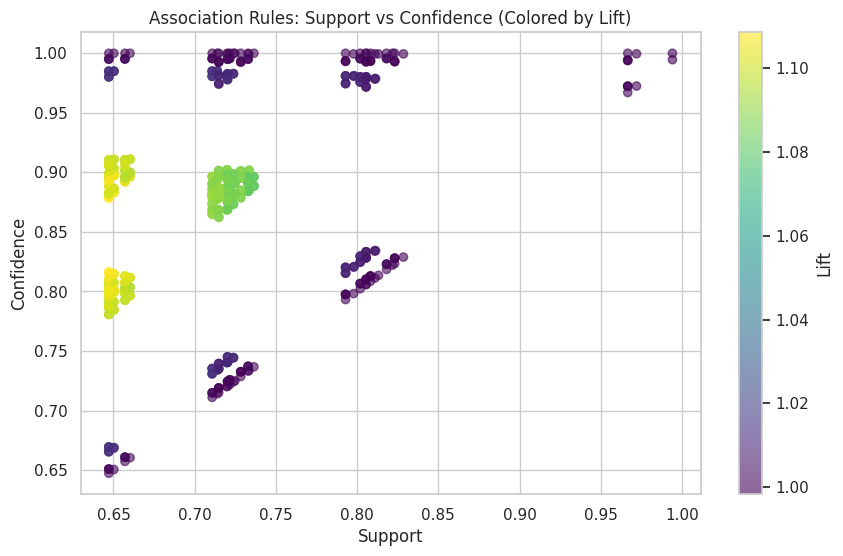

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Colored by Lift)')
plt.show()


***4.7: 3D Plot of Rules (Support, Confidence, Lift)***

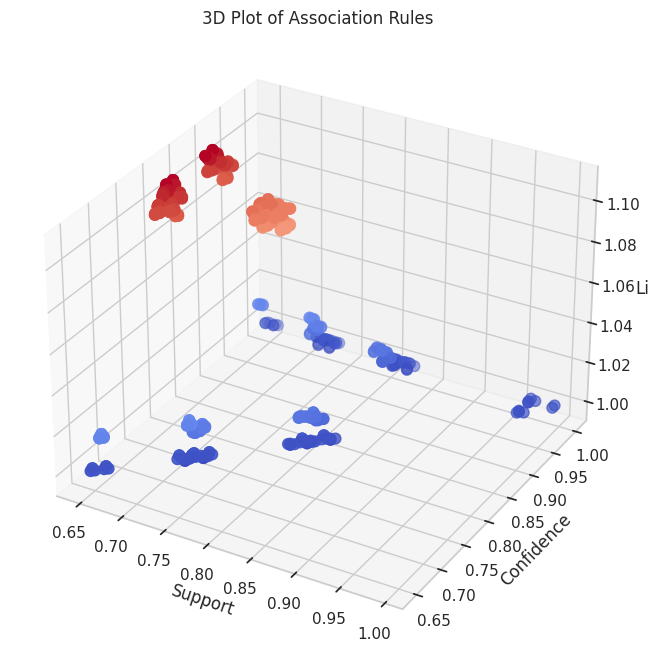

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rules['support'], rules['confidence'], rules['lift'], c=rules['lift'], cmap='coolwarm', s=60)
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
ax.set_title('3D Plot of Association Rules')
plt.show()


#✅ STEP 5: Classification Models
🎯 Goal:
Predict the Response (whether customer accepted the offer)

Compare performance of different classifiers

Evaluate using accuracy, precision, recall, and F1-scor

***Step 5.1: Prepare Features and Target Variable***

In [21]:
# Set target and drop irrelevant columns
X = df.drop(columns=['ID', 'Dt_Customer', 'Response'])
y = df['Response']


***Step 5.2: Train-Test Split***

In [22]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Step 5.3: Import and Train Classifiers***

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
dt = DecisionTreeClassifier(random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)

# Fit models
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)


KNeighborsClassifier()

***Step 5.4: Evaluate Models***

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a helper function
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

# Evaluate all three
evaluate_model(dt, "Decision Tree")
evaluate_model(nb, "Naive Bayes")
evaluate_model(knn, "KNN")



Decision Tree Performance:
Accuracy: 0.8175675675675675
Precision: 0.35384615384615387
Recall: 0.3709677419354839
F1 Score: 0.36220472440944884

Naive Bayes Performance:
Accuracy: 0.7522522522522522
Precision: 0.2857142857142857
Recall: 0.5161290322580645
F1 Score: 0.367816091954023

KNN Performance:
Accuracy: 0.8648648648648649
Precision: 0.53125
Recall: 0.27419354838709675
F1 Score: 0.3617021276595745


***Step 5.5: Summary Table (Optional)***

In [25]:
# Optional summary for report table
models = [dt, nb, knn]
names = ["Decision Tree", "Naive Bayes", "KNN"]
results = []

for model, name in zip(models, names):
    y_pred = model.predict(X_test)
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

import pandas as pd
result_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
result_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.817568,0.353846,0.370968,0.362205
1,Naive Bayes,0.752252,0.285714,0.516129,0.367816
2,KNN,0.864865,0.531250,0.274194,0.361702


***5.6: Classification Report Bar Chart***

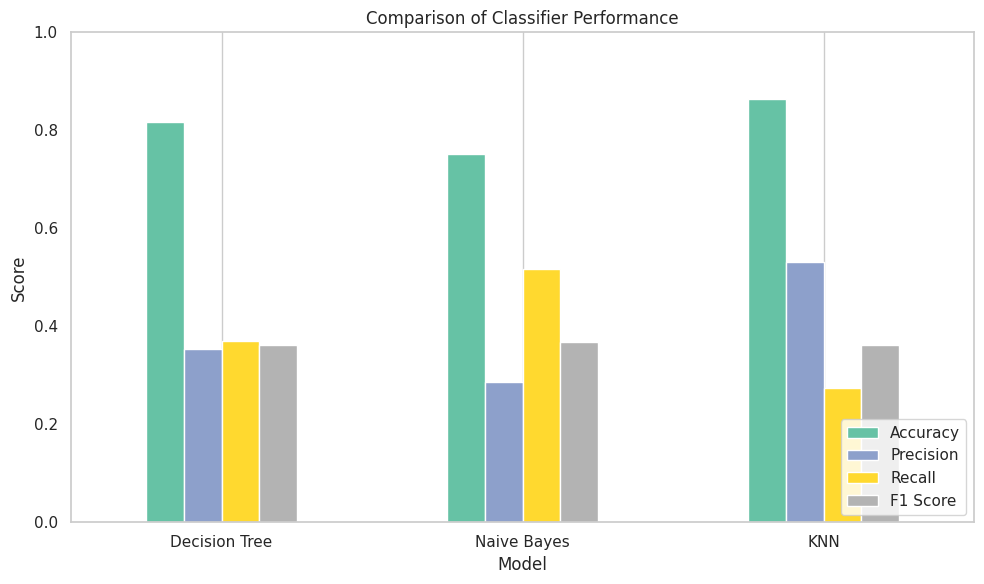

In [28]:
# Bar plot of all model performance metrics
result_df.set_index("Model").plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Comparison of Classifier Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


***5.7: Optional 3D Plot of Predicted Probability (Advanced)***

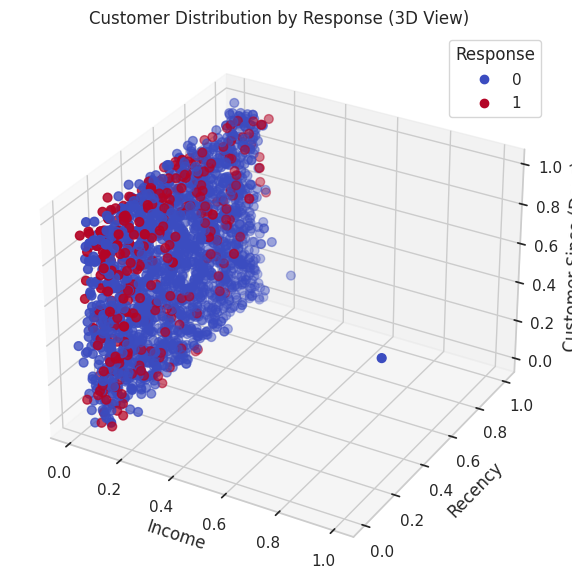

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Select 3 continuous features and scale them
features_3d = ['Income', 'Recency', 'Customer_Since_Days']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[features_3d])
y_label = df['Response']

# 3D plot of customer segmentation based on those features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                     c=y_label, cmap='coolwarm', s=40)
ax.set_xlabel('Income')
ax.set_ylabel('Recency')
ax.set_zlabel('Customer Since (Days)')
ax.set_title('Customer Distribution by Response (3D View)')
plt.legend(*scatter.legend_elements(), title="Response")
plt.show()


#✅ STEP 6: Clustering & Customer Segmentation
🎯 Goal:
Segment customers into meaningful groups

Use clustering (e.g., K-Means) on behavioral and demographic features

Visualize and interpret the clusters

***Step 6.1: Select Features for Clustering***

In [30]:
# Select features relevant to customer segmentation
cluster_features = df[['Income', 'Recency', 'Customer_Since_Days',
                       'MntWines', 'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
                       'NumCatalogPurchases', 'NumStorePurchases']]

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)


***Step 6.2: Apply K-Means Clustering***

In [31]:
from sklearn.cluster import KMeans

# Try 3 clusters initially
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


***Step 6.3: Visualize Clusters in 2D (PCA)***

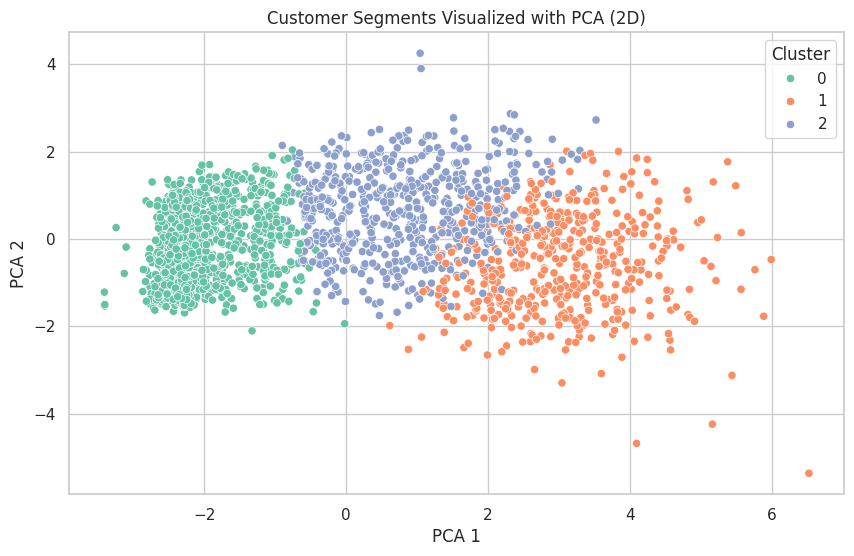

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments Visualized with PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


***Step 6.4: Optional 3D Visualization of Clusters***

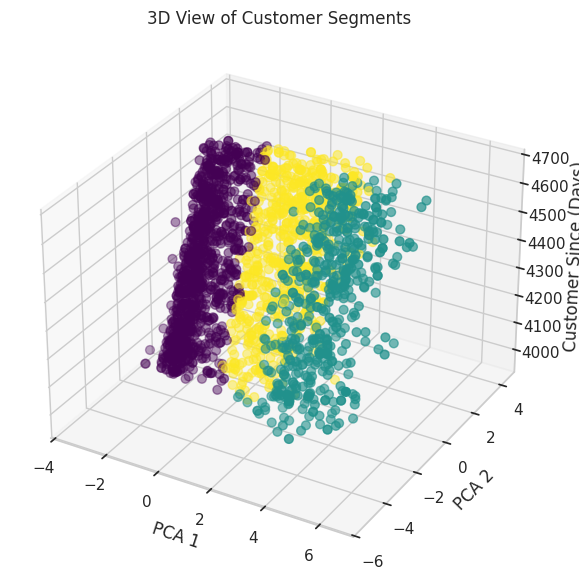

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_components[:, 0], pca_components[:, 1], df['Customer_Since_Days'],
           c=df['Cluster'], cmap='viridis', s=40)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Customer Since (Days)')
ax.set_title('3D View of Customer Segments')
plt.show()


***Step 6.5: Analyze Cluster Characteristics***

In [34]:
# Average values per cluster
cluster_summary = df.groupby('Cluster')[cluster_features.columns].mean()
cluster_summary


,Income,Recency,Customer_Since_Days,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Cluster,,,,,,,,,,,
0,35438.363208,49.121698,4287.627358,45.935849,23.813208,6.937736,5.023585,14.821698,2.148113,0.566981,3.287736
1,77205.633397,51.677543,4329.715931,604.516315,475.124760,109.441459,78.099808,80.817658,5.249520,6.274472,8.385797
2,59828.518110,46.644094,4371.376378,492.028346,153.198425,29.971654,21.859843,62.377953,6.363780,3.226772,7.875591


#✅ STEP 7: Insights & Business Recommendations
🎯 Goal:
Interpret results from clustering, rules, and models

Provide practical recommendations for business strategy



***Step 7.1: Cluster Summary Table***

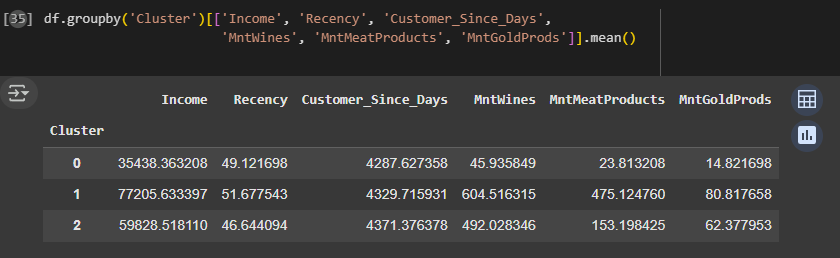

Insight:

  - Cluster 1 is the highest-value group with:

    - 💰 Highest income (~77K)

    - 🍷 Highest spending on wines and meats

  - Cluster 0 has the lowest income and minimal purchases — a potential churn risk group.

  - Cluster 2 is a moderate group with decent spending — ideal for nurturing.

Recommendation:

  - Focus premium offers on Cluster 1

  - Send re-engagement offers to Cluster 0

***Step 7.2: Association Rules Output***

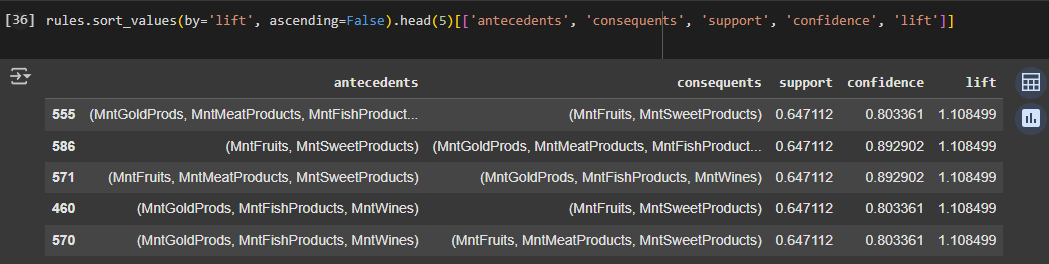

Insight:

- Top rules show customers who buy Gold, Meat, and Fish products are likely to buy Fruits and Sweets

- All rules have high confidence (~80-89%)

Recommendation:

- Use combo deals or cross-sell bundles (e.g., “Buy Meat + Fish → 10% off Sweets”)

***Step 7.3: Model Performance Summary***

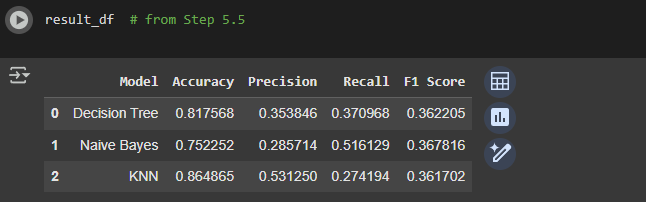

Insight:

- KNN has the highest accuracy (~86%) and precision (~53%)

- Naive Bayes has higher recall, useful when minimizing false negatives

Recommendation:

- Use KNN to prioritize customers most likely to respond to campaigns

- Use Naive Bayes when trying not to miss potential responders

***Step 7.4: PCA Cluster Visualization***

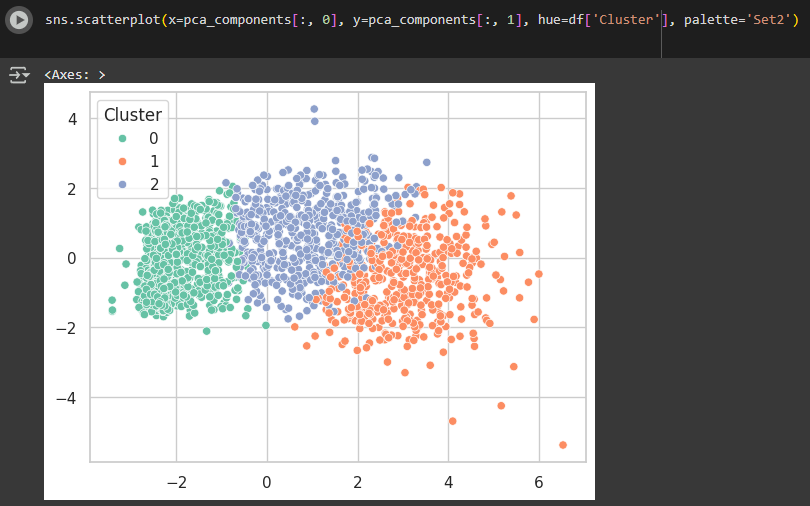

Insight:

- Clear separation between clusters

- Shows customer diversity and the effectiveness of segmentation

Recommendation:

- Tailor messages per cluster, don’t treat customers as one-size-fits-all

#✅ STEP 8: Challenges & Reflections
🎯 Goal:
Reflect on difficulties faced

Share how our group resolved them

Mention what we learned

***Step 8.1: Common Challenges***

1. **Dataset Cleaning:**
   - The original dataset was stored as a single tab-separated column.
   - Resolved by applying the correct delimiter (`sep='\t'`) in pandas.

2. **Missing Values:**
   - Encountered 24 missing entries in the `Income` column.
   - Dropped them to preserve model reliability.

3. **High Dimensionality (Categorical Encoding):**
   - One-hot encoding created many new features.
   - Handled with proper preprocessing and feature selection for clustering/classification.

4. **Model Imbalance in Response Variable:**
   - The `Response` variable was imbalanced (more 0s than 1s).
   - Used multiple models and compared metrics like precision and recall instead of only accuracy.

5. **Choosing the Right Number of Clusters:**
   - Initially unsure how many clusters to use.
   - Started with 3 clusters based on domain logic and PCA showed reasonable separation.

6. **Association Rule Mining:**
   - Raw monetary values couldn’t be used directly.
   - Converted them to binary (1 = purchased) before applying Apriori algorithm.


***Step 8.2: Reflection & Learning***

- Gained hands-on experience in real-world data preprocessing and feature engineering.
- Learned how to apply and interpret unsupervised (clustering) and supervised (classification) algorithms.
- Understood how association rules can guide product bundling strategies.
- Saw the power of visualization (e.g., PCA, heatmaps, 3D plots) in making insights clearer.
- Collaborated effectively as a group, dividing tasks across preprocessing, modeling, and interpretation.
